Link to NEAT paper: https://nn.cs.utexas.edu/soft-view.php?SoftID=4

In [1]:
#init
import random, math
import matplotlib.pyplot as plt

# anyway goals for next time is to create a display to make sure stuff works

innovation = 0 # Whenever a new gene appears, a global innovation number is incremented


# configuration
# init_mean = 0
# init_stdev = 1.0
# min = -20.0
# max = 20.0
# mutation_rate = 0.2
# mutate_power = 1.2
# replace_rate = 0.05

ModuleNotFoundError: No module named 'matplotlib'

#### Testing modules:

draw_nodes(points_x, points_y) function
draw_conns(lines_x, lines_y) function


To do: reduce points_x, points_y down to purely coords

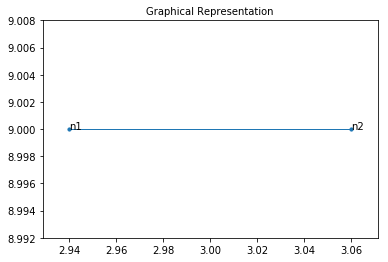

In [3]:
# drawing function
def draw_point(points_x, points_y, lines_x, lines_y): 
    # draw points
    plt.scatter(points_x, points_y, s=10) 
    for i in range(len(points_x)):
        plt.text(points_x[i],points_y[i],f'n{i+1}')
        
    # draw lines
    for i in range(0, len(lines_x), 2):
        # Plot the number in the list and set the line thickness.
        plt.plot(lines_x[i:i+2], lines_y[i:i+2], linewidth=1)
    
    # Set chart title.
    plt.title("Graphical Representation", fontsize=10)
    
    # Set x axis label.
#     plt.xlabel("x", fontsize=10)
    # Set y axis label.
#     plt.ylabel("y", fontsize=10)
    # Set size of tick labels. 
#     plt.tick_params(axis='both', which='major', labelsize=9)
    
    # Display plot
    plt.show()

    
points_x = [2.94,3.06]
points_y = [9,9]
x_number_values = [2.94, 3.06]
y_number_values = [9, 9]
draw_point(points_x, points_y, x_number_values, y_number_values)

In [24]:
# drawing function
def draw_nodes(coords): 
    points_x = [x[0] for x in coords]
    points_y = [x[1] for x in coords]
    
    # draw points
    plt.scatter(points_x, points_y, s=10) 
    for i in range(len(points_x)):
        plt.text(points_x[i],points_y[i],f'n{i+1}')
        
def draw_conns(coords, weights):
    lines_x = [c[0] for c in coords]
    lines_y = [c[1] for c in coords]
    
    # draw lines
    count = 0
    for i in range(0, len(lines_x), 2):
        # Plot the number in the list and set the line thickness.
#         if enabled[count]:
        plt.plot(lines_x[i:i+2], lines_y[i:i+2], linewidth=1)
        plt.text( ( lines_x[i] + lines_x[i+1] )/2.0 , ( lines_y[i] + lines_y[i+1] )/2.0 ,f'{weights[count]}')
        count += 1
    
def draw(node_coords, conn_coords, conn_weights):
    plt.clf() # clear plot
    
    draw_nodes(node_coords)
    draw_conns(conn_coords, conn_weights)
    
    # Set chart title.
    plt.title("Graphical Representation", fontsize=10)
    
    # Display plot
    plt.show()
    
    # potentially add a way to display weights in the middle of connections

In [5]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

### Define the Representation:

Design a genome representation that represents the neural network structure. It typically consists of nodes and connections.
Each node represents a neuron, and each connection represents a synapse connecting two neurons.
Assign unique IDs to each node and connection.

In [ ]:
# Constructing the general model then exporting it in a string form?

In [4]:
class Node(): # gene
    def __init__(self, node_type, enabled=True):
        # "Node genes provide a list of inputs, hidden nodes, and outputs that can be connected."
        self.node_type = node_type # sensor, hidden, output
        self.connections = [] # contains connections in the next step only CHANGE: connections from previous step
        
        self.coords = (0,0) # coords in display
        self.enabled = enabled 
        self.bias = 0 
        
        self.data = 0
    
    def __str__(self):
        return f"[Node; Type:{self.node_type}; {len(self.connections)} connections; Coords: {self.coords}]"
    
    # for getting data: the usage of model might actually want to use strings instead?
    def get_data(self):
        return self.data
    
    def add_connection(self, conn):
        self.connections.append(conn)

class Connection():
    def __init__(self, in_node, out_node, weight, enabled=True):
        global innovation
        
        self.in_node = in_node
        self.out_node = out_node
        self.weight = float(weight)
        
        self.enabled = enabled # is the connection in use
        self.innov = innovation # innovation marker - age of the connection
    
    def __str__(self):
        return f"[Connection; {self.in_node.coords}:{self.out_node.coords}; Weight:{self.weight}; Enabled:{self.enabled}; Gen:{self.innov}]"

In [45]:
class Sensor_Node(Node): # no of sensor nodes all same - bias node also sensor
    def __init__(self):
        super().__init__("Sensor")

class Hidden_Node(Node):
    def __init__(self):
        super().__init__("Hidden")
        
    def calc_data(self): # not sure about implementing matrices yet
        data = 0
        for conn in self.connections:
            data += conn.in_node.get_data() * conn.weight
        data += self.bias
        self.data = sigmoid(data)
        
        return self.data

class Output_Node(Node):
    def __init__(self):
        super().__init__("Output")
        
    # for get_data - value should define a certain amplitude
    def calc_data(self):
        data = 0
        for conn in self.connections:
            data += conn.in_node.get_data() * conn.weight
        data += self.bias
        self.data = sigmoid(data)
        
        return self.data

In [53]:
# more future past self me here - I'm implementing my kind of scuffed connection and node collection as genome
# I think it is what I was trying to do last time but I'm not completely sure cos I'm not exactly reading the paper
# hehe good luck 

# ok yea update again I redid the connections and nodes part but haven't touched mutations, future problem for future me, aka you :)

class Genome(): # Houses genes and connections
    def __init__(self):
        # changed from list of nodes to separate sensors, output and hidden lists
        self.sensors = []
        self.output = []
        self.hidden = []
        self.Connections = []
        
        self.innovation = 0
        
    def __str__(self):
        return "[Model; {len(self.Nodes)} nodes; {len(self.Connections)} connections; Innovation: {self.innovation}]"
    
    def Display(self): # can draw the boxes some other time # I drew the boxes alr so not much need for this now
        print()
        for i, conn in enumerate(self.Connections):
            print(f"{i}: {conn.in_node} -> {conn.out_node} ") if conn.enabled else print(f"{i}: {conn.in_node} -> {conn.out_node} DIS") 
   
    def calc_coords(self):
        for count,i in enumerate(self.sensors):
            i.coords = (0, (count+1)/(len(self.sensors)+1))
        for count,j in enumerate(self.hidden):
            # note for future me
            # try? to calculate x value for hidden layers to be easier maybe
            j.coords = (1, (count+1)/(len(self.hidden)+1))
        for count,k in enumerate(self.output):
            k.coords = (2, (count+1)/(len(self.output)+1))
    
    def Draw(self): # draw the model thing
        # scuffed as shit till you fix it
        # but ye have insufficient skill to do it so
        
        self.calc_coords()
        node_coords, conn_coords, conn_weights = [], [], []

#         node_coords = [s.coords for s in self.sensors] + [o.coords for o in self.output] + [h.coords for h in self.hidden]
#         conn_coords = [[conn.in_node.coords, conn.out_node.coords] for conn in self.Connections]
#         conn_weights = [conn.weight for conn in self.Connections]
#         conn_enabled = [conn.enabled for conn in self.Connections]
        
        for i in self.sensors: # diplay all sensors
            node_coords.append(i.coords)
            for j in i.connections:
                if j.enabled:
                    conn_coords.append(i.coords)
                    conn_coords.append(j.out_node.coords)
                    conn_weights.append(j.weight)

        for k in self.output: # display output
            node_coords.append(k.coords)
            
        for l in self.hidden: # display hidden
            if l.enabled: # only if node is enabled
                node_coords.append(l.coords)
                for m in l.connections:
                    if m.enabled:
                        conn_coords.append(l.coords)
                        conn_coords.append(m.out_node.coords)
                        conn_weights.append(m.weight)

        draw(node_coords, conn_coords, conn_weights)

    def create_connection(self, in_node, out_node, weight, enabled=True): 
        # I realised how difficult this would be to directly get nodes as arguments
        # so change it to collecting indexes instead - (0,1) would be index 1 node in sensors
        # haha no I changed my mind - direct nodes might be easier after all
            
        conn = Connection(in_node, out_node, weight, enabled)
        in_node.add_connection(conn)
        self.Connections.append(conn)
        
    def create_node(self, typ):
        if typ == "Sensor":
            self.sensors.append(Sensor_Node())
        elif typ == "Output":
            self.output.append(Output_Node())
        elif typ == "Hidden":
            self.hidden.append(Hidden_Node())
        else:
            print("Apa what invalid type - change it before you mess everything else up")
        
    def get_connections(self):
        enabled_conns = [] 
        for conn in self.Connections:
            if conn.enabled:
                enabled_conns.append(conn)
        return enabled_conns

    def Mutate(self): # incomplete
        global innovation 
        innovation += 1
        
#         Mutate_Add_Conn_Rate
#         Mutate_Add_Node_Rate
        
        
        pass
    
    # Structural mutation:
    def Mutate_Add_Conn(self): # a single new connection gene with a random weight is added connecting two previously unconnected nodes
        nodes = self.sensors + self.output + self.hidden
        connections = self.get_connections() # this would only get enabled connections - correct?
        random_weight = random.uniform(0,1) # how random is random? (0 to 1)? - according to algo parameters, add to current bias
        random_node1, random_node2 = random.choices(nodes, k=2)

        count = 0
        test_limit = 10 # limit testing for now 
        
        # maximum connections is total_input*total_hidden + total_hidden*total_output
        while True or count < test_limit: # need add except where all are connected 
            valid = True
            for conn in connections: # could be better
                # rather than a for loop just store in and out nodes as tuples in conns
                # then do (if (random_node1, random_node2) in conn.connecteed_nodes)
                
                # should do another check to to only support feed forward connection
                if (random_node1 in [conn.in_node, conn.out_node]) and (random_node2 in [conn.in_node, conn.out_node]):
                    valid = False
                elif random_node1.node_type == "Output" or random_node2.node_type == "Sensor":
                    valid = False
            
            if not valid:
                random_node1, random_node2 = random.choices(nodes, k=2)
                count += 1
            else:
                break
            
        if count < test_limit:
            print("Chose node 1 as", random_node1)
            print("Chose node 2 as", random_node2)
            new_conn = Connection(random_node1, random_node2, random_weight)
            self.Connections.append(new_conn)
            random_node1.add_connection(new_conn)

            print("Mutated: Connection Added")
            print(new_conn)
            return True
        else:
            print("Mutation testing too long.")
            return False

    def Mutate_Add_Node(self): # an existing connection is split and the new node placed where the old connection used to be
        # The old connection is disabled and two new connections are added to the genome.
        random_conn = random.choice(self.get_connections())
        random_conn.enabled = False
        self.create_node("Hidden")

        # The new connection leading into the new node receives a weight of 1
        self.create_connection(random_conn.in_node, self.hidden[-1], 1.0)

        # the new connection leading out receives the same weight as the old connection
        self.create_connection(self.hidden[-1], random_conn.out_node, random_conn.weight)

    def Mutate_Conn_Weight(self):
        mutation_magnitude = 0.1 # idk can be changed (0.1 - 0.3)?
        
        random_conn = random.choice(self.get_connections()) # randomly choose an enabled connection
#         random_conn.conn_weight = random.uniform(0,1) # randomise weight
        random_conn.weight += round(random.gauss(0, mutation_magnitude), 16) # randomise weight to 16 dp?
        
        # ok this is pretty wrong
        # looking at video it should follow some normal distribution thingy 
        # search for "NEAT algorithm from scratch (it was hard)"" by Tech with Nikola
    
    def Mutate_Conn_Enabled(self):
        # switches connection activation (activate/ deactivate random connections)
        random_conn = random.choice(self.Connections) # randomly choose an enabled connection
        random_conn.enabled = not random_conn.enabled
    
    def Mutate_Node_Enabled(self):
        # switches node activation (activate/deactivate random nodes)
        # for deactivating neuron, just need to "disable" but not actually disable all its connections
        # done by removing connections from self.Connections and marking neuron as disable
        # need to check if neuron is disabled before doing stuff
        
        random_node = random.choice(self.hidden)
        random_node.enabled = not random_node.enabled

    def Mutate_Node_Bias(self):
        # bias of existing nodes can be mutated during the evolution process. 
        # This mutation involves adding a random value to the current bias value. 
        # The magnitude of the random value and the probability of mutation are determined by the algorithm's parameters.
        pass
    

#### Code testing:

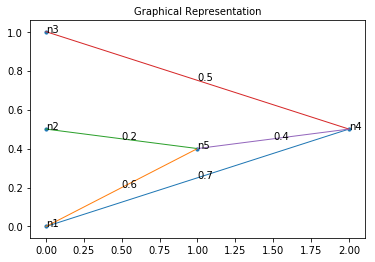

In [33]:
# midway check - 10/01/2024
# print nodes and connections to make sure they work - doing pg 9 example

# points_x, points_y is coordinates of points
# conns_x, conns_y connects every two coordinates together
# draw_point(points_x, points_y, conns_x, conns_y) - the function

sensors = []
hidden = []
output = []

# always add node coords in this order: sensors, output, hidden - but printing layer is sensors, hidden, output
for i in range(3):
    sensors.append(Sensor_Node())
    sensors[i].coords = (0,(i*1)/2)
    
output.append(Output_Node())
output[0].coords = (2,.5)

hidden.append(Hidden_Node())
hidden[0].coords = (1,.4)

sensors[0].add_connection(Connection(sensors[0], output[0], 0.7, enabled=True))
sensors[1].add_connection(Connection(sensors[1], output[0], 0.5, enabled=False))
sensors[2].add_connection(Connection(sensors[2], output[0], 0.5, enabled=True))
sensors[1].add_connection(Connection(sensors[1], hidden[0], 0.2, enabled=True))
hidden[0].add_connection(Connection(hidden[0], output[0], 0.4, enabled=True))
sensors[0].add_connection(Connection(sensors[0], hidden[0], 0.6, enabled=True))

# n4.add_connection(Connection(n4, n5, 0.6, enabled=True)) 
# this backwards one seems to be possible but I'll leave it out of my code for now

node_coords, conn_coords, conn_weights = [], [], []

for i in sensors: # diplay all sensors
    node_coords.append(i.coords)
    for j in i.connections:
        if j.enabled:
            conn_coords.append(i.coords)
            conn_coords.append(j.out_node.coords)
            conn_weights.append(j.weight)

for k in output: # display output
    node_coords.append(k.coords)

for l in hidden: # display hidden
    node_coords.append(l.coords)
    for m in l.connections:
        if m.enabled:
            conn_coords.append(l.coords)
            conn_coords.append(m.out_node.coords)
            conn_weights.append(m.weight)

draw(node_coords, conn_coords, conn_weights)

Same code testing but using the classes

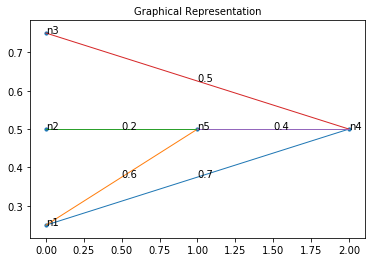

In [54]:
g = Genome()

# always add node coords in this order: sensors, output, hidden - but printing layer is sensors, hidden, output
for i in range(3):
    g.create_node("Sensor")
    
g.create_node("Output")
g.create_node("Hidden")

g.create_connection(g.sensors[0], g.output[0], 0.7)
g.create_connection(g.sensors[1], g.output[0], 0.5, enabled=False)
g.create_connection(g.sensors[2], g.output[0], 0.5)
g.create_connection(g.sensors[1], g.hidden[0], 0.2)
g.create_connection(g.hidden[0], g.output[0], 0.4)
g.create_connection(g.sensors[0], g.hidden[0], 0.6)

# n4.add_connection(Connection(n4, n5, 0.6, enabled=True)) 
# this backwards one seems to be possible but I'll leave it out of my code for now

g.Draw()
# g.Mutate_Add_Conn()
# g.Draw()

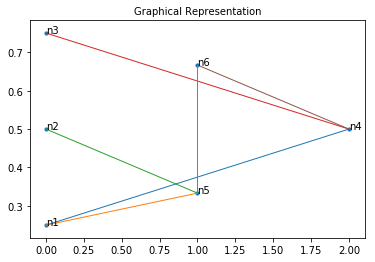

In [67]:
g.Mutate_Add_Node()
g.Draw()

# ok ye I think this finally works too

Testing other mutations:

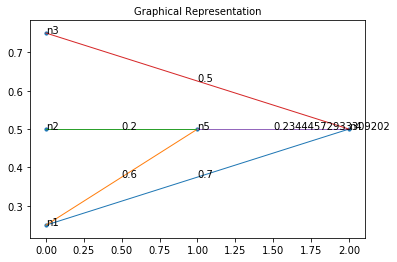

In [38]:
# Mutate change conn weight
g.Mutate_Conn_Weight()
g.Draw()

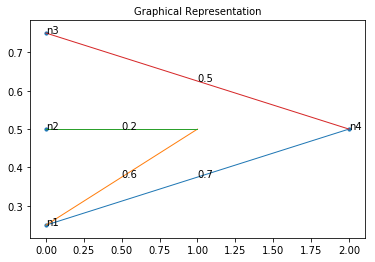

In [55]:
# Mutate change enabled
# g.Mutate_Conn_Enabled()
g.Mutate_Node_Enabled()
g.Draw()

In [56]:
# test data functions
g.sensors[0].data = 0.6
g.sensors[1].data = 0.7
g.sensors[2].data = 0.8

for node in g.hidden:
    node.calc_data()
g.output[0].calc_data()

print(g.output[0].data)

0.5


In [ ]:
# additional mutations:
# switches connection activation (activate/ deactivate random connections)
# switches node activation (activate/deactivate random nodes)

In [10]:
# and crap I havent tested any of this yet - cant wait to find out some buggy thing (currently at pg12, before 3.3)
# ok good for you future me, I tested till the nodes and connections bit, trying to see if I can decipher the genome part now
# hello this is slightly future me - I tested the rest of the code already so progress so far should be working

### Initialization:

Generate an initial population of genomes with random neural network structures.
Assign fitness scores to each genome based on their performance in the problem domain.

In [ ]:
# implementation

### Evaluation:

For each genome, create a neural network based on its structure.
Evaluate the performance of the neural network on the problem/task.
Assign fitness scores to the genomes based on their performance.

### Selection:

Select the fittest genomes from the population for reproduction.
Use a selection method, such as tournament selection or roulette wheel selection, to choose the parents.

### Reproduction:

Generate offspring by applying genetic operators (mutation and crossover) to the selected parents.
Mutation: Modify the structure or parameters of a genome, such as adding a new node or changing a connection weight.
Crossover: Combine the structure and parameters of two parent genomes to create a new offspring.

In [ ]:
# something about using hitorical (innov) number but idk what
# using it to line up genes from genome parents
# matching are randomly chosen
# excess and disjoint always included from more fit one

# matching genes are inherited
# disjoint genes (sam enumber of genese)
# excess genes (where one has more than the other)
# disjoint and excess arre inherited randomly

# page 12/13

# if a gene was disabled in a parent, it has a 75% chance of staying disabled
# page 15

### Speciation:

Divide the population into species based on their structural similarity.
Use a distance metric to measure the similarity between genomes.
Maintain representative genomes for each species.

In [ ]:
# splits up the population into several species 
# based on the similarity of topology and connections

In [ ]:
# the more disjoint two genomes are, the less evolutionary history they share, less compatibility distance

# these variables can be tweaked
c1 = 1 # excess_weight
c2 = 1 # disjoint_weight
c3 = 1 # weight for avg_weight_diff

E= 0 # no_of_excess
D = 0 # no_of_disjoint
W_avg = 0 # avg_weight_diff_of_matching
N = 0 # no_of_genes

compatibility_distance = (c1 * E + c2 * D)/N + c3 * W_avg

### Population Control:

Control the size of the population by removing low-performing genomes.
Apply techniques like elitism (preserving the best genomes) to maintain the best solutions.

### Repeat:

Iterate the evaluation, selection, reproduction, and speciation steps for multiple generations.
Allow the population to evolve over time.

### Termination:

Decide the termination condition, such as reaching a maximum number of generations or achieving a satisfactory solution.
Once the termination condition is met, select the best genome(s) from the final population as the solution(s).